# Introduction

* Student Name: Vidushi Katare
* Student NUmber: 20228033
* The purpose of this dataset is to classify whether a client will stay with the bank or not
 

# Importing Libraries

In [2]:
import tensorflow as tf
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_curve
import seaborn as sns
sns.set(palette="Set2")


### Reading the dataset and checking for null values

In [3]:
df=pd.read_csv('../input/deep-learning-az-ann/Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**No null values**

# Data Visualisation and Understanding it

In [4]:
df.describe().T
#df.descibe()
# Avoid using common describe because if there were more columns you wouldnt be able to see all of them

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Dropping uncorrelated columns

In [6]:
# There are a few useless columns such as RowNumber, Surname, CustomerId, they do not have any correlation to the prediction
df.drop(['RowNumber','Surname','CustomerId'],axis=1, inplace= True) 
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking correlation from the remaining columns
* If one column has a bad correlation we need to check out why, to see if there is a reason behind it like too many outliers
* (Neural networks are actually capable of utilizing uncorrelated columns and those columns can even improve the model)

<AxesSubplot:>

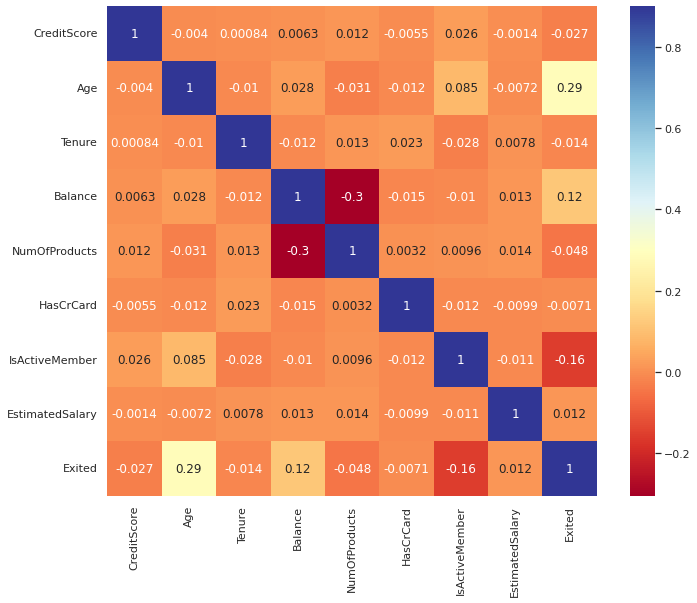

In [7]:
corrmat=df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9,square=True,annot=True,cmap="RdYlBu")

In [8]:
df.drop(labels='Tenure',axis=1,inplace=True)
# Be carefull to not run this line of code twice or an error will appear

# Checking for outliers

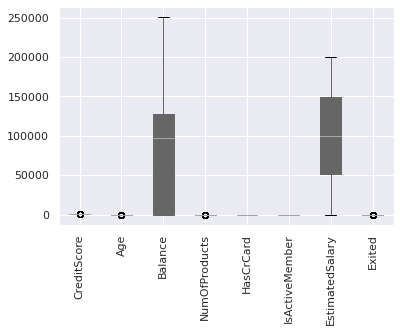

In [9]:
bplot = df.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

**No Outliers**

# Feature Engineering
* Since this dataset has a lot of categorical columns, we need to convert them into something more easily readable therefore we use get dummies pandas function to make sure every category has a integer value, and not a specific string. And they only vary beetween 1  and 0.
* On the first cell we will convert the easy ones like Gender Geography NumOfPruducts, which are already on a integer mode
* The second cell is going to massively convert columns which should be transfered into a categorical status

In [10]:
df=pd.get_dummies(df,columns=['Gender','Geography','NumOfProducts'])
# Be carefull to not run this line of code twice or an error will appear
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Balance            10000 non-null  float64
 3   HasCrCard          10000 non-null  int64  
 4   IsActiveMember     10000 non-null  int64  
 5   EstimatedSalary    10000 non-null  float64
 6   Exited             10000 non-null  int64  
 7   Gender_Female      10000 non-null  uint8  
 8   Gender_Male        10000 non-null  uint8  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  NumOfProducts_1    10000 non-null  uint8  
 13  NumOfProducts_2    10000 non-null  uint8  
 14  NumOfProducts_3    10000 non-null  uint8  
 15  NumOfProducts_4    10000 non-null  uint8  
dtypes: float64(2), int64(5)

**Making Age and Credit Score into categorical data**
* ### Age:

In [11]:
# print('Max Age', df['Age'].max())
# print('Min Age',df['Age'].min())
# print('Mean Age',df['Age'].mean())
age_cate=[0 if i < 38.92  else  1 if i < 50  else 2 if i < 60 else 4 for i in df['Age']]
df['AgeCate']=age_cate
df.drop(labels='Age', axis=1,inplace=True)
df.head(n=10)

,CreditScore,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,AgeCate
0,619,0.00,1,1,101348.88,1,1,0,1,0,0,1,0,0,0,1
1,608,83807.86,0,1,112542.58,0,1,0,0,0,1,1,0,0,0,1
2,502,159660.80,1,0,113931.57,1,1,0,1,0,0,0,0,1,0,1
3,699,0.00,0,0,93826.63,0,1,0,1,0,0,0,1,0,0,1
4,850,125510.82,1,1,79084.10,0,1,0,0,0,1,1,0,0,0,1
5,645,113755.78,1,0,149756.71,1,0,1,0,0,1,0,1,0,0,1
6,822,0.00,1,1,10062.80,0,0,1,1,0,0,0,1,0,0,2
7,376,115046.74,1,0,119346.88,1,1,0,0,1,0,0,0,0,1,0
8,501,142051.07,0,1,74940.50,0,0,1,1,0,0,0,1,0,0,1
9,684,134603.88,1,1,71725.73,0,0,1,1,0,0,1,0,0,0,0


In [12]:
df['AgeCate']=df['AgeCate'].astype('category')
#We need to define as category 
df=pd.get_dummies(df,columns=['AgeCate'])
df.head()

,CreditScore,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,AgeCate_0,AgeCate_1,AgeCate_2,AgeCate_4
0,619,0.00,1,1,101348.88,1,1,0,1,0,0,1,0,0,0,0,1,0,0
1,608,83807.86,0,1,112542.58,0,1,0,0,0,1,1,0,0,0,0,1,0,0
2,502,159660.80,1,0,113931.57,1,1,0,1,0,0,0,0,1,0,0,1,0,0
3,699,0.00,0,0,93826.63,0,1,0,1,0,0,0,1,0,0,0,1,0,0
4,850,125510.82,1,1,79084.10,0,1,0,0,0,1,1,0,0,0,0,1,0,0


* ### CreditScore:

In [13]:
print('Max Age', df['CreditScore'].max())
print('Min Age',df['CreditScore'].min())
print('Mean Age',df['CreditScore'].mean())
credit_cate=[0 if i < 450  else  1 if i < 600  else 2 if i < 700 else 4 for i in df['CreditScore']]
df['CreditScoreCate']=credit_cate

Max Age 850
Min Age 350
Mean Age 650.5288


In [14]:
df['CreditScoreCate']=df['CreditScoreCate'].astype('category')
#We need to define as category
df=pd.get_dummies(df,columns=['CreditScoreCate'])
df.drop(labels='CreditScore', axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            10000 non-null  float64
 1   HasCrCard          10000 non-null  int64  
 2   IsActiveMember     10000 non-null  int64  
 3   EstimatedSalary    10000 non-null  float64
 4   Exited             10000 non-null  int64  
 5   Gender_Female      10000 non-null  uint8  
 6   Gender_Male        10000 non-null  uint8  
 7   Geography_France   10000 non-null  uint8  
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  NumOfProducts_1    10000 non-null  uint8  
 11  NumOfProducts_2    10000 non-null  uint8  
 12  NumOfProducts_3    10000 non-null  uint8  
 13  NumOfProducts_4    10000 non-null  uint8  
 14  AgeCate_0          10000 non-null  uint8  
 15  AgeCate_1          10000 non-null  uint8  
 16  AgeCate_2          1000

# Step 2 - Standardizing
* **Getting our Y and X variables**

In [15]:
X = df.drop(["Exited"],axis=1)
y = df["Exited"].values

In [16]:
#This function is going to help split our data into training data and testing data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [17]:
from sklearn.preprocessing import StandardScaler
# Here we are making sure the  training data that is inputed  has a standard distribution format

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns.values)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values)

* **Checking Shape**

In [18]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (7500, 21)
x test:  (2500, 21)
y train:  (7500,)
y test:  (2500,)


# Step 3- Modeling


* **Model 1:**

In [19]:
model=keras.Sequential([
layers.Dense(10,activation='relu',input_dim=X_train.shape[1]),
layers.Dense(10,activation='relu'),
layers.Dense(10,activation='relu'),
layers.Dense(10,activation='relu'),
layers.Dense(10,activation='relu'),
layers.Dense(1,activation='sigmoid')
])


model.compile(
	loss=keras.losses.BinaryCrossentropy(from_logits=False),
	optimizer=keras.optimizers.Adam(learning_rate=0.001),
	metrics=['accuracy']
	)

model.fit(X_train, y_train,batch_size=128 ,epochs=100,verbose=1)
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test,y_test))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/100
59/59 [==============================] - 1s 2ms/step - loss: 0.6134 - accuracy: 0.7919
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7965
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.7965
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.7965
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8237
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8501
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8531
Epoch 8/100
59/59 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8551
Epoch 9/100
59/59 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8567
Epoch 10/100
59/59 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8585
Epoch 11/

* **Model 2:**

In [37]:
model2=keras.Sequential([
layers.Dense(10,activation='relu',input_dim=X_train.shape[1]),
layers.Dense(1,activation='sigmoid')
])

model2.compile(
	loss=keras.losses.BinaryCrossentropy(from_logits=False),
	optimizer=keras.optimizers.Adam(learning_rate=0.001),
	metrics=['accuracy']
	)

model2.fit(X_train, y_train,batch_size=128 ,epochs=100,verbose=1)
history2 = model2.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test,y_test))

Epoch 1/100
59/59 [==============================] - 1s 1ms/step - loss: 0.5702 - accuracy: 0.7404
Epoch 2/100
59/59 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7996
Epoch 3/100
59/59 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8127
Epoch 4/100
59/59 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8168
Epoch 5/100
59/59 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8229
Epoch 6/100
59/59 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8299
Epoch 7/100
59/59 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8329
Epoch 8/100
59/59 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8367
Epoch 9/100
59/59 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.8384
Epoch 10/100
59/59 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8400
Epoch 11/

# Plotting

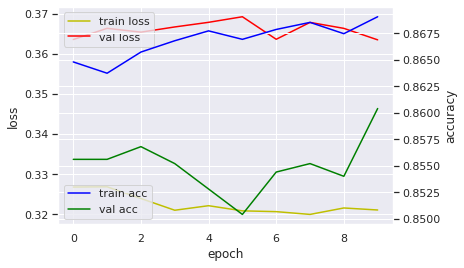

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
#model 1
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

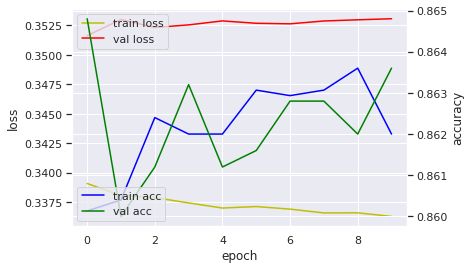

In [38]:
#model 2
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')
acc_ax.plot(history2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history2.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Step 4- Evaluation

In [39]:
#Model 1
model.evaluate(X_test,y_test,batch_size=128,verbose=1)
model.summary()
#Model 2
model2.evaluate(X_test,y_test,batch_size=128,verbose=1)
model2.summary()

20/20 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8604
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                220       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 671
Trainable params:

* ### Training Data

In [40]:
#Model 1

score, acc = model.evaluate(X_train, y_train,batch_size=128)
print('Train score:', score)
print('Train accuracy:', acc*100)

59/59 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.8697
Train score: 0.3138778507709503
Train accuracy: 86.97333335876465


In [41]:
#Model 2

score, acc = model2.evaluate(X_train, y_train,batch_size=128)
print('Train score:', score)
print('Train accuracy:', acc*100)

59/59 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8635
Train score: 0.3346841335296631
Train accuracy: 86.34666800498962


* ### Testing Data

In [42]:
#Model 1

score, acc = model.evaluate(X_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc*100)

250/250 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8604
Test score: 0.36351603269577026
Test accuracy: 86.04000210762024


In [43]:
#Model 2

score, acc = model2.evaluate(X_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc*100)

250/250 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8636
Test score: 0.35306575894355774
Test accuracy: 86.36000156402588


### Predicting

In [54]:
#Model 1
y_pred = model.predict(X_test)
print(y_pred)
print()

#Model 2
y_pred2 = model2.predict(X_test)
print(y_pred2)
print()

#Actual Values
prediction_targets2 = y_test[X_test.index]
print(prediction_targets2)

[[0.02506322]
 [0.22456014]
 [0.05662104]
 ...
 [0.01072547]
 [0.02334467]
 [0.59897065]]

[[0.0131028 ]
 [0.10625759]
 [0.05955747]
 ...
 [0.01386628]
 [0.01274472]
 [0.8015821 ]]

[0 0 0 ... 0 0 1]
